After pre-processing and standardizing your data, you saved it to a CSV file named 'preprocessed_data.csv' using the to_csv method. Here are some potential next steps you might consider depending on your project goals:

Exploratory Data Analysis (EDA):
Explore the preprocessed data to gain insights into its distribution, relationships between variables, and any patterns. This might involve creating visualizations or summary statistics.

In [51]:
# Example EDA with pandas and seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# Load the preprocessed data
data = pd.read_csv("E:/CustomerPersonalityAnalysis/notebooks/preprocessed_data.csv")

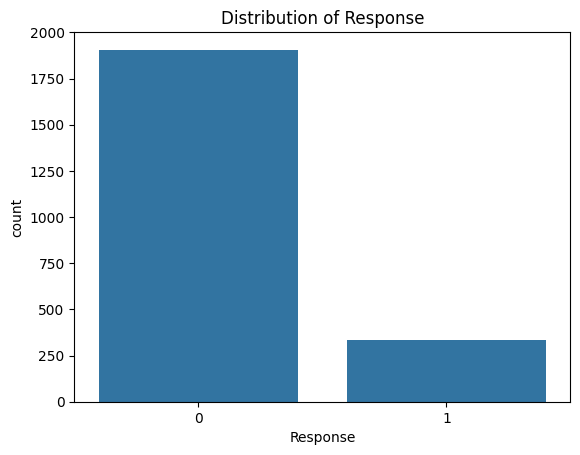

In [53]:

# Exploratory Data Analysis (EDA)
# Visualize the distribution of the target variable
sns.countplot(x='Response', data=data)
plt.title('Distribution of Response')
plt.show()

In [54]:
# Explore numerical features
numerical_columns = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']
data[numerical_columns].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts
count,2240.000000,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2240.000000,2240.000000
mean,1968.805804,4.837400e-17,-1.268826e-17,-6.978545e-17,-2.061843e-17,166.950000,37.525446
std,11.984069,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,225.715373,54.628979
min,1893.000000,-2.018090e+00,-1.696001e+00,-9.031668e-01,-6.614492e-01,0.000000,0.000000
25%,1959.000000,-6.674801e-01,-8.671566e-01,-8.325919e-01,-6.363012e-01,16.000000,3.000000
50%,1970.000000,-2.020403e-02,-3.777284e-03,-3.875991e-01,-4.602650e-01,67.000000,12.000000
75%,1977.000000,6.408743e-01,8.596020e-01,5.952483e-01,1.684356e-01,232.000000,50.000000
max,1996.000000,2.454513e+01,1.722981e+00,3.533390e+00,4.343008e+00,1725.000000,259.000000


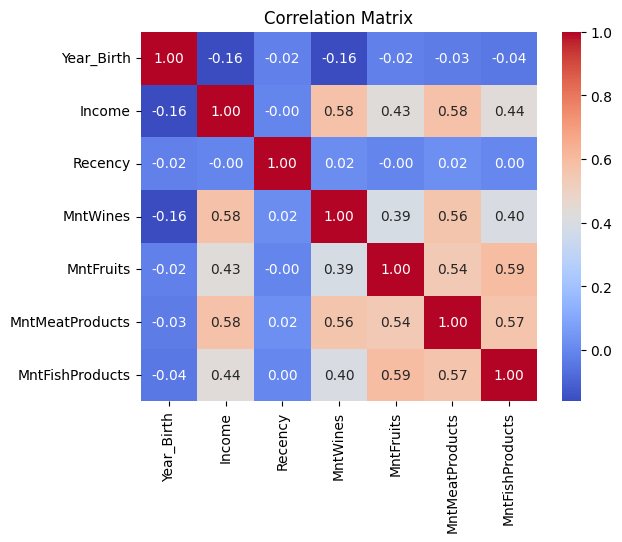

In [55]:
# Visualize the correlation matrix
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [56]:
# Feature Engineering: Convert 'Dt_Customer' to numerical features
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Customer_Year'] = data['Dt_Customer'].dt.year
data['Customer_Month'] = data['Dt_Customer'].dt.month
data['Customer_Day'] = data['Dt_Customer'].dt.day

In [57]:

# Drop the original 'Dt_Customer' column and non-numeric columns
data.drop(['Dt_Customer'], axis=1, inplace=True)

In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Response', axis=1), data['Response'], test_size=0.2, random_state=42)


In [59]:
# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

In [61]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [62]:

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       379
           1       0.67      0.23      0.34        69

    accuracy                           0.86       448
   macro avg       0.77      0.61      0.63       448
weighted avg       0.84      0.86      0.83       448



Hyperparameter Tuning:
You can optimize the performance of your model by tuning its hyperparameters. Use techniques like GridSearchCV or RandomizedSearchCV to search for the best combination of hyperparameters.

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [65]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier()

In [66]:
# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [67]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [68]:
# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [69]:
# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Feature Importance:
Understand which features are more important for your model's predictions.

In [70]:
# Get feature importances
feature_importances = best_model.feature_importances_

In [71]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

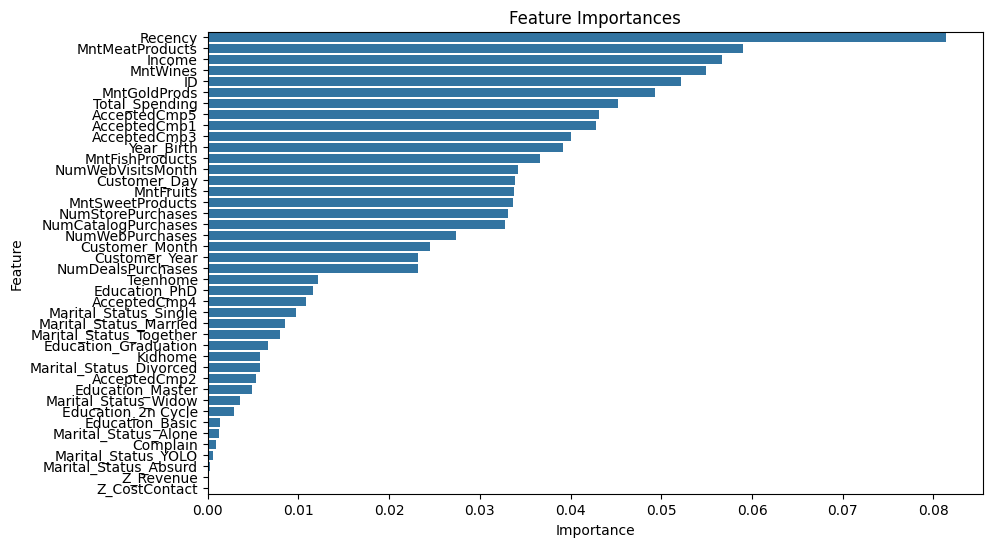

In [72]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

Model Interpretability:
Explore techniques like SHAP (SHapley Additive exPlanations) to interpret the output of your model.

In [73]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [74]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(best_model)

In [75]:
# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

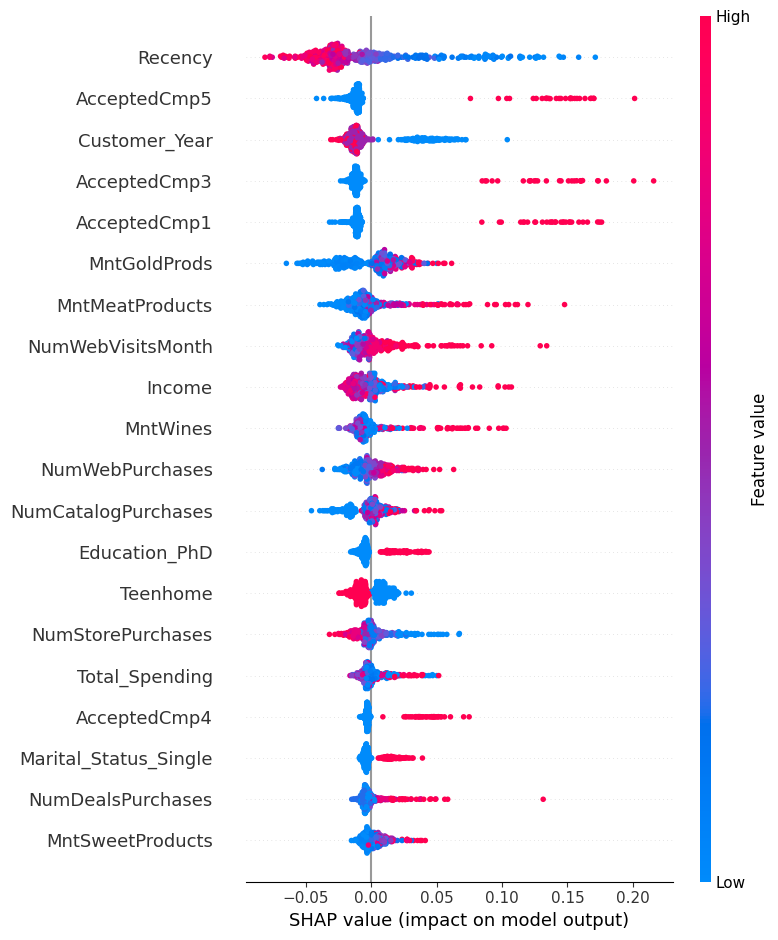

In [76]:
# Summary plot
shap.summary_plot(shap_values[1], X_test)

In [77]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

In [78]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [79]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       379
           1       0.76      0.28      0.40        69

    accuracy                           0.88       448
   macro avg       0.82      0.63      0.67       448
weighted avg       0.86      0.88      0.85       448



In [80]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'trained_model.joblib')


['trained_model.joblib']

In [113]:
# Print the columns of your DataFrame
print(data.columns)



Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Total_Spending'],
      dtype='object')


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [115]:
# Load preprocessed data
data = pd.read_csv('E:/CustomerPersonalityAnalysis/notebooks/preprocessed_data.csv')

In [116]:
# Assuming 'Response' is the target variable
target_variable = 'Response'
features = [col for col in data.columns if col != target_variable]

In [117]:
# Split the data into features (X) and target variable (y)
X = data[features]
y = data[target_variable]


In [118]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [120]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [121]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [122]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [123]:
# Define the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(random_state=42))])


In [124]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatal...
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Total_Spending'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Dt_Customer'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [125]:
# Model Evaluation
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.87


In [126]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       379
           1       0.71      0.25      0.37        69

    accuracy                           0.87       448
   macro avg       0.79      0.61      0.65       448
weighted avg       0.85      0.87      0.84       448

